In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.offline as pyo
import plotly.graph_objects as go 
from plotly.offline import iplot 

In [364]:
orders_df = pd.read_csv('orders.csv')
orders_df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


Loaded CSV and tested with head()

In [365]:
orders_df.shape

(9994, 16)

Exploring the shape or size of the dataset

In [366]:
orders_df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [367]:
orders_df.columns=orders_df.columns.str.lower()
orders_df.columns = orders_df.columns.str.replace(' ','_')
orders_df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

Column names were not as per the best practice, hence refined it.

In [368]:
orders_df.isna().sum()

order_id            0
order_date          0
ship_mode           1
segment             0
country             0
city                0
state               0
postal_code         0
region              0
category            0
sub_category        0
product_id          0
cost_price          0
list_price          0
quantity            0
discount_percent    0
dtype: int64

In [369]:
orders_df['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [370]:
orders_df['ship_mode']= orders_df['ship_mode'].replace(np.nan,"Not Available")
orders_df['ship_mode']= orders_df['ship_mode'].replace('unknown',"Not Available")

In [371]:
orders_df['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'First Class',
       'Same Day'], dtype=object)

It was found only 1 value was null, and by analysing other values in the column, It made sense to rename all unknown/nan values to Not Available

In [372]:
orders_df['country'].unique()

array(['United States'], dtype=object)

In [373]:
orders_df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [374]:
orders_df['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [375]:
orders_df['sub_category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

A few more columns were verified for any anomolies

In [376]:
orders_df.duplicated().sum()

np.int64(0)

There are no duplicate records.

In [377]:
missing_price = orders_df[orders_df['cost_price']== 0]
missing_price

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
15,16,2022-06-18,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,OFF-BI-10000756,0,0,3,5
30,31,2022-11-20,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Envelopes,OFF-EN-10001509,0,0,2,5
61,62,2023-04-08,First Class,Consumer,United States,Troy,New York,12180,East,Office Supplies,Art,OFF-AR-10001868,0,0,1,5
70,71,2022-11-29,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,OFF-BI-10004654,0,0,1,3
75,76,2023-04-17,First Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Binders,OFF-BI-10004182,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,9839,2023-03-01,Standard Class,Consumer,United States,Long Beach,California,90805,West,Office Supplies,Labels,OFF-LA-10001771,0,0,1,3
9859,9860,2022-08-13,Standard Class,Home Office,United States,Richmond,Indiana,47374,Central,Office Supplies,Fasteners,OFF-FA-10003472,0,0,2,2
9869,9870,2023-01-02,First Class,Corporate,United States,Mason,Ohio,45040,East,Office Supplies,Binders,OFF-BI-10000494,0,0,2,5
9945,9946,2023-06-26,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,OFF-PA-10000327,0,0,1,4


Upon checking for '0' values on cost_price, It was found that 507 records were recorded with price 0, This needs to be handelled.

In [378]:
for index, row in missing_price.iterrows():
    product_id = row['product_id'] 
    product_rows = orders_df[orders_df['product_id'] == product_id]
    most_cost = product_rows['cost_price'].mode()  

    if not most_cost.empty:
        orders_df.at[index, 'cost_price'] = most_cost.iloc[0]

orders_df[orders_df['cost_price']==0]

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
15,16,2022-06-18,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,OFF-BI-10000756,0,0,3,5
30,31,2022-11-20,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Envelopes,OFF-EN-10001509,0,0,2,5
61,62,2023-04-08,First Class,Consumer,United States,Troy,New York,12180,East,Office Supplies,Art,OFF-AR-10001868,0,0,1,5
75,76,2023-04-17,First Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Binders,OFF-BI-10004182,0,0,3,4
101,102,2022-07-25,Standard Class,Home Office,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,OFF-BI-10002609,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,9729,2022-09-28,First Class,Consumer,United States,Lowell,Massachusetts,1852,East,Office Supplies,Supplies,OFF-SU-10001935,0,0,2,4
9752,9753,2023-06-17,First Class,Home Office,United States,Seattle,Washington,98115,West,Office Supplies,Binders,OFF-BI-10000145,0,0,1,2
9760,9761,2023-10-02,Standard Class,Home Office,United States,Springdale,Arkansas,72762,South,Office Supplies,Art,OFF-AR-10000657,0,0,2,3
9802,9803,2022-08-29,Second Class,Consumer,United States,New York City,New York,10024,East,Office Supplies,Binders,OFF-BI-10004182,0,0,2,3


In the above logic, we replaced the missing cost price with mode of cost_prices available for existing products. Almost half of the records are assumed to have a valid cost_price. However, we do not data for rest of the records, So it would be best to remove from further analysis.

In [379]:
orders_df = orders_df[orders_df['cost_price'] != 0].reset_index(drop=True)
orders_df[orders_df['cost_price']==0]

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent


We removed rest of the records with reseting index.

In [380]:
missing_listPrice = orders_df[orders_df['list_price']==0]
missing_listPrice

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
67,71,2022-11-29,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,OFF-BI-10004654,10,0,1,3
103,109,2023-10-12,Standard Class,Consumer,United States,Charlotte,North Carolina,28205,South,Office Supplies,Art,OFF-AR-10000390,10,0,1,3
109,115,2023-11-08,Second Class,Consumer,United States,Columbus,Ohio,43229,East,Office Supplies,Envelopes,OFF-EN-10002600,10,0,2,4
121,127,2022-07-14,Standard Class,Consumer,United States,Phoenix,Arizona,85023,West,Office Supplies,Binders,OFF-BI-10003274,20,0,2,4
131,137,2022-03-28,Standard Class,Consumer,United States,Roseville,California,95661,West,Office Supplies,Fasteners,OFF-FA-10002988,10,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,9833,2022-11-25,Second Class,Consumer,United States,Dallas,Texas,75220,Central,Office Supplies,Paper,OFF-PA-10001526,10,0,1,5
9561,9839,2023-03-01,Standard Class,Consumer,United States,Long Beach,California,90805,West,Office Supplies,Labels,OFF-LA-10001771,10,0,1,3
9582,9860,2022-08-13,Standard Class,Home Office,United States,Richmond,Indiana,47374,Central,Office Supplies,Fasteners,OFF-FA-10003472,10,0,2,2
9667,9946,2023-06-26,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,OFF-PA-10000327,10,0,1,4


There are records where list_price is also 0, we can assume  it to be the same as cost_price and update it accordingly.

In [381]:
orders_df.loc[orders_df['list_price'] == 0, 'list_price'] = orders_df['cost_price']
orders_df[orders_df['list_price']==0]

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent


In [382]:
orders_df.dtypes

order_id             int64
order_date          object
ship_mode           object
segment             object
country             object
city                object
state               object
postal_code          int64
region              object
category            object
sub_category        object
product_id          object
cost_price           int64
list_price           int64
quantity             int64
discount_percent     int64
dtype: object

In [383]:
orders_df['order_date']=pd.to_datetime(orders_df['order_date'],format="%Y-%m-%d")
orders_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


The order date data type is formated to datetime data type.

Our data now looks clean. Let's move ahead with structuring dataset to perform analytics.

The dataset contains cost price, list price and discount percent. Using these, we shall generate sale price, discount and profit columns to gain useful insights.

In [384]:
orders_df['discount'] = orders_df['list_price']*orders_df['discount_percent']*0.01
orders_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0


In [385]:
orders_df['sale_price']=orders_df['list_price']-orders_df['discount']
orders_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0


In [386]:
orders_df['profit'] = orders_df['sale_price']-orders_df['cost_price']
orders_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


We shall now extract year and month from the order date to gain insightful variation across years and months.

In [387]:
orders_df['year'] = orders_df['order_date'].dt.year
orders_df['month'] = orders_df['order_date'].dt.month
orders_df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0,2022,7


Now, our dataset is ready to be explored and exported to be used for dashboarding.

In [389]:
orders_df.to_csv('cleanOrders.csv',index=False)

This creates a file with the name specified in the working directory.

EDA

In [251]:
orders_df['year'].unique()

array([2023, 2022], dtype=int32)

In [399]:
year_profitSales = orders_df.groupby('year')[['profit','sale_price']].sum()
year_profitSales

,profit,sale_price
year,,
2022,101572.6,1096812.6
2023,103501.5,1121651.5


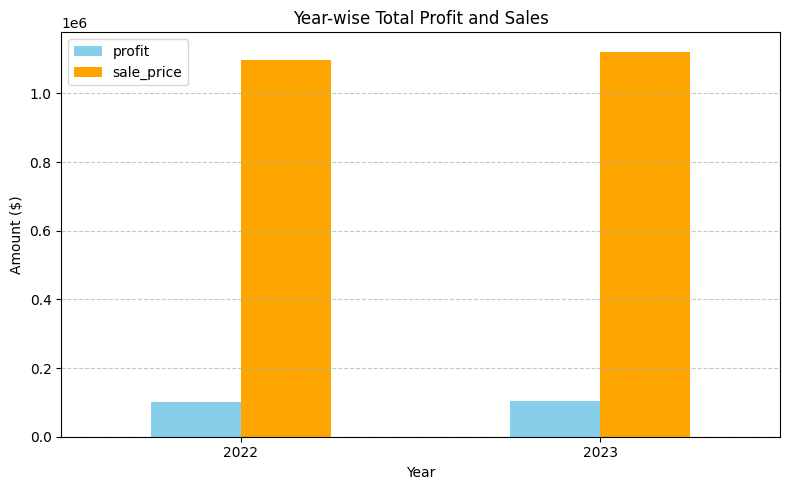

In [412]:
year_profitSales.plot(kind='bar', figsize=(8,5), color=['skyblue', 'orange'])
plt.title("Year-wise Total Profit and Sales")
plt.ylabel("Amount ($)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There has been an increase in sales as well as the profit over the year.

In [400]:
region_sales = orders_df.groupby(['region','year'])[['profit','sale_price']].sum()
region_sales

profit  sale_price
region  year                     
Central 2022  23142.5    227432.5
        2023  23200.0    257290.0
East    2022  27388.1    310288.1
        2023  30810.1    344600.1
South   2022  18297.2    188167.2
        2023  19694.9    190384.9
West    2022  32744.8    370924.8
        2023  29796.5    329376.5

All regions have shown increase in sales & profit however leaving out WEST which has seen a major decline in sales and profit.

In [406]:
segment_ProfitSales = orders_df.groupby(['segment','year'])[['sale_price','profit']].sum()
segment_ProfitSales

sale_price   profit
segment     year                     
Consumer    2022    557556.1  50146.1
            2023    563617.3  51387.3
Corporate   2022    336302.4  33182.4
            2023    345961.6  32431.6
Home Office 2022    202954.1  18244.1
            2023    212072.6  19682.6

Sales have increased in 2023 compared to 2022 across all segments however, A decline in profit is visible for Corporate segment.

In [409]:
productSales = orders_df.groupby(['product_id','year'])[['sale_price','profit']].sum()
productSales

sale_price  profit
product_id      year                    
FUR-BO-10000112 2023       805.1    45.1
FUR-BO-10000330 2022      1036.4   146.4
FUR-BO-10000362 2022       679.0    69.0
                2023      1410.4   120.4
FUR-BO-10000468 2022       481.2    61.2
...                          ...     ...
TEC-PH-10004924 2022         9.7    -0.3
                2023        38.5    -1.5
TEC-PH-10004959 2022       328.8    28.8
TEC-PH-10004977 2022      4264.8   324.8
                2023       834.2    74.2

[3382 rows x 2 columns]

Here we can understand how each products performance has differend over the year

C:\Users\yashp\AppData\Local\Temp\ipykernel_4100\1587781905.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




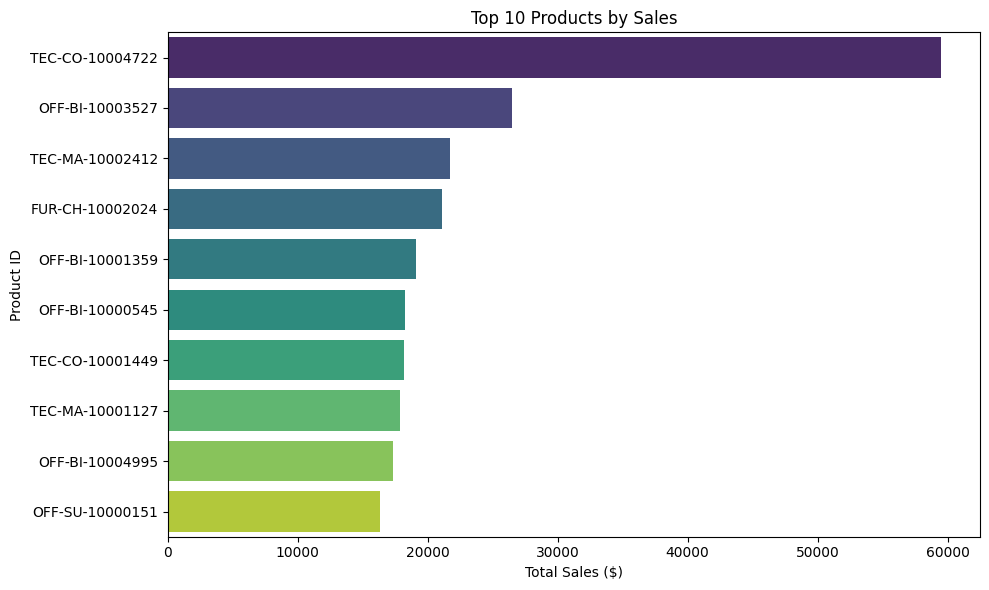

In [413]:
top_products = (
    orders_df.groupby("product_id")["sale_price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


In [411]:
CategorySalesProfit = orders_df.groupby(['category','sub_category','year'])[['profit','sale_price']].sum()
CategorySalesProfit

profit  sale_price
category        sub_category year                     
Furniture       Bookcases    2022   5459.5     53469.5
                             2023   5036.6     57346.6
                Chairs       2022  14725.3    151395.3
                             2023  15089.8    165429.8
                Furnishings  2022   4233.6     47883.6
                             2023   3337.5     40637.5
                Tables       2022  10315.9    111305.9
                             2023   8275.3     88055.3
Office Supplies Appliances   2022   6373.4     65053.4
                             2023   3889.9     38769.9
                Art          2022    915.2     13865.2
                             2023    928.4     12828.4
                Binders      2022   8662.7     88272.7
                             2023  10505.4    108905.4
                Envelopes    2022    607.2      8767.2
                             2023    638.6      7178.6
                Fasteners    2022     36.7      1516.7
                             2023      6.3      1576.3
                Labels       2022    344.1      6464.1
                             2023    289.6      5849.6
                Paper        2022   3056.4     38966.4
                             2023   2939.4     37009.4
                Storage      2022   8906.8    102926.8
                             2023  10630.4    113010.4
                Supplies     2022   1500.4     16150.4
                             2023   1936.7     28936.7
Technology      Accessories  2022   7387.2     77627.2
                             2023   8057.4     83977.4
                Copiers      2022   8780.3     82090.3
                             2023   5718.6     62268.6
                Machines     2022   7243.2     73723.2
                             2023  10878.5    109178.5
                Phones       2022  13024.7    157334.7
                             2023  15343.1    160693.1

Here we can analyse how each category- sub category has contributed to sales over compared in both years

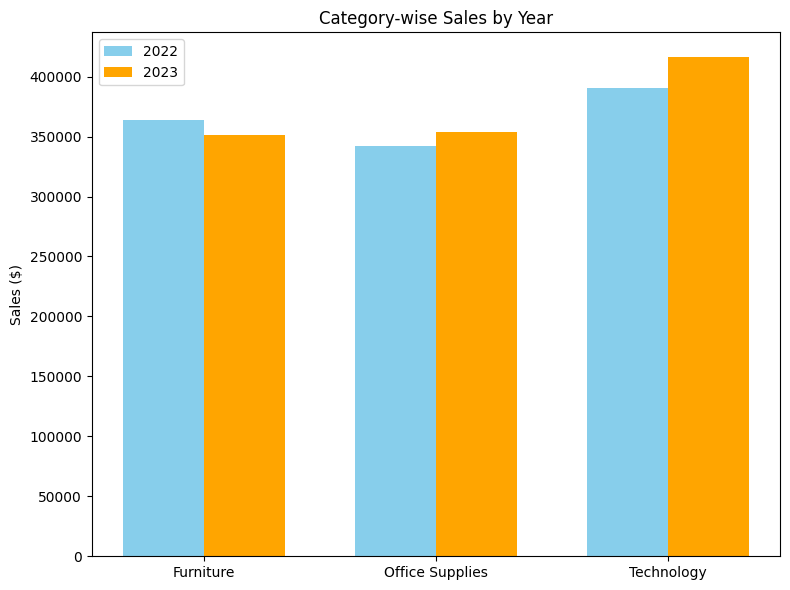

In [416]:
category_summary = (
    orders_df.groupby(["category", "year"])[["profit", "sale_price"]]
    .sum()
    .reset_index()
)
# Plot
fig, ax = plt.subplots(figsize=(8,6))
categories = category_summary["category"].unique()
x = np.arange(len(categories))
width = 0.35

# Extract sales and profit by year
sales_2022 = category_summary[category_summary["year"] == 2022]["sale_price"]
sales_2023 = category_summary[category_summary["year"] == 2023]["sale_price"]

ax.bar(x - width/2, sales_2022, width, label="2022", color="skyblue")
ax.bar(x + width/2, sales_2023, width, label="2023", color="orange")

ax.set_title("Category-wise Sales by Year")
ax.set_ylabel("Sales ($)")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.tight_layout()
plt.show()

Upon our understanding on the contribution of different attributes towards the sales and profit, we can design and develop a dashboard effectively for business to undertsand the trends based on their region-state-city.

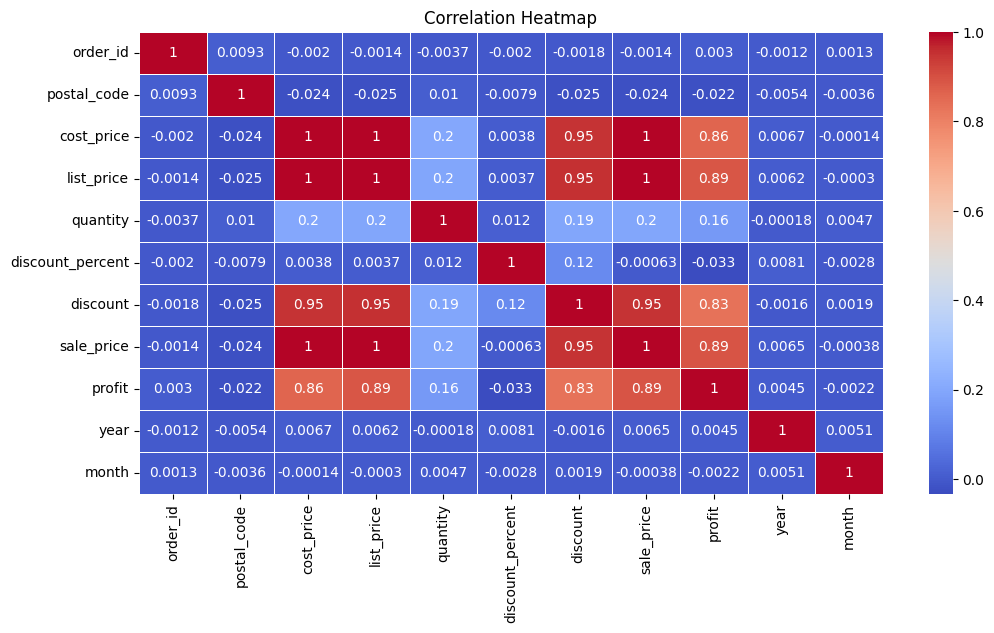

In [417]:
plt.figure(figsize=(12, 6))
sns.heatmap(orders_df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Heat map shows multiple columns having high correlation with others, these can we highly efficient to analyse data in the dashboards.